# Advanced Validation Assignment

## Data Prep

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [5]:
#Setting the feature we want to predict
y = data.pop("malignant")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

## Task 0
### Using the breast_cancer dataset, we will create a random forest model that predicts the malignant variable value given other relevant variables. For this task, we will be using a single holdout (test/trian split) and a Grid Search to optimize hyperparameters. Finally, we will measure the model's performance using Accuracy, Precision, Recall, and AUC.

### Creating a Random Forest using Holdout and Grid Search.

In [7]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [8]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [10]:
best_rfc = estimator.best_estimator_

### Performance

#### Accuracy



In [11]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

Accuracy:  0.964285714286


In [12]:
y_hat = best_rfc.predict(X_test)

In [13]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [14]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, Length: 140, dtype: int64

### Precision and Recall

In [15]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



In [16]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 3 42]]


**Precision:**  42 / (42 + 2) = .95

**Recall:**   42 / (42 + 3) = .93

#### AUC

In [17]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.996725146199


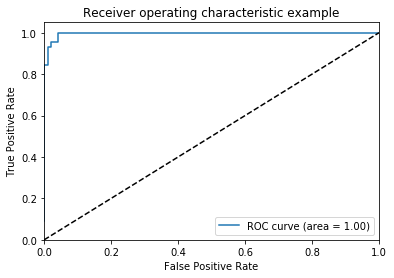

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Task 1

### 10-Fold Cross Validation

1.  Split the data into 10 chunks.
2.  Train 10 models, retain a chunk for testing and use the other 9 chunks for training.
3.  The result is 10 scores, which can be combined into a single average score for the model.

In [22]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [20]:
scores

array([ 0.91549296,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.97142857,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [21]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ('Average 10-Fold CV Score: %f' % (mean_score))
print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Average 10-Fold CV Score: 0.965794
Score is 0.965794 +/-  0.018764
95 percent probability that if this experiment were repeated over and over the average score would be between 0.947030 and 0.984558


## Task 2

## Single Holdout AUC Score vs 10-Fold Cross Validation Score

As stated above in Task 0, we built a Random Forest model and used Grid Search with 80% of our data ("training set") so as to find the most beneficial hyperparameters. This helped us find the best possible model ("best rfc"). The model obtained an AUC score of 0.996725146199 when applied to the remaining 20% of data ("test data"). In comparison, when performing 10-Fold Cross Validation with our best rfc on the entire data set we obtained an average score of 0.965794, which is about 3% lower than our AUC score. 

To further explore performance, we applied a confidence interval to our 10-Fold Cross Validation average score. This provides a more accurate performance measure of 0.965794 +/- 0.018764 for the model. What this means is that if we repeated the experiment over and over again, there is a 95% probability that the average score would be between 0.947030 and 0.984558. Again, we find that our AUC score is higher than the upper bound of the 10-Fold Cross Validation confidence interval. 

Side Note: If the data is large enough, it is a good idea to split the data into 60% for training, 20% for validation (used for hyperparameter selection) and 20% for testing. If the data is small, as it is in this case, we would most likely want to apply Cross Validation.

## Task 3

## Description of our Model's Performance  

Running our model on the test set, we obtained an accuracy of 0.964285714286. That is, it correctly predicted whether a tumor was malignant about 95% of the time.  

In addition, out of all the tumors in the test set that are in fact malignant, the model correctly identified 95% of them correctly. Conversely, the model incorrectly identified 5% of all actual non-malignant tumors in the test set as malignant. This metric is called precision and is found using the following: (tp / tp+fp). Thus, for our model we have the following precision: 42 / (42 + 2) = .95

Another important metric is Recall, which is found using: (tp / tp + fn). The Recall found from running model on our test set is 42 / (42 + 3) = .93. This means that out of all the test instances that our model identified as malignant tumors, 93% of them were actually malignant. Conversely, 7% of those identified as malignant were not actually malignant. 

Finally, as mentioned above, the Area Under the Curve or AUC Score obtained for our model on the test set was 0.996725146199. This is, in other words, the overall performance of our model. 

After reviewing all the metrics identified above, it seems our model performed fairly well considering we did not do much to create it. However, given that we built our model using a 20% holdout, we might have an overfitted model. If this is the case, our model may not perform well in the real world. In addition, our model may not be good enough for something as serious as predicting whether a tumor is malignant or not. As mentioned in Task 2 above, our data set is small. Unless we obtain a much larger dataset, so as to build a model on a Train, Validation, Test split and thus avoid overfitting, we need to consider Cross Validation. Also as explained above, 10-Fold Cross Validation provided a more accurate measure of our model's performance: 0.965794 +/- 0.018764. Again, when dealing with health tests, I believe a better performing model is needed. 